In [1]:
import stmpy
%pylab inline
print(style.available)
pylab.style.use('classic')


Populating the interactive namespace from numpy and matplotlib
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
pylab.style.use('classic')

In [3]:
def sample(frequency=0.1):
    w = 2*pi*frequency
    w0 = 2*pi*(1-frequency)
    x = linspace(0, 40, 1024)
    atoms = linspace(0, 10, 11)

    wave = cos(w*x) + 1j*sin(w*x)
    sample = cos(w*atoms) + 1j*sin(w*atoms)
    alias = cos(w0*x) + 1j*sin(w0*x)

    ft = stmpy.tools.fft(wave, units='amplitude')
    wt = stmpy.tools.fftfreq(x.size, x[-1]-x[0])*2

    fs = stmpy.tools.fft(sample, units='amplitude')
    ws = stmpy.tools.fftfreq(atoms.size, atoms[-1]-atoms[0])*2

    fig, ax = subplots(2,1,figsize=[8,4])
    line1, = ax[0].plot(x, real(wave), color='gray')
    line2, = ax[0].plot(atoms, real(sample), 'o', color='orange')
    line3, = ax[0].plot(x, real(alias), color='orange', lw=0.5, dashes=(3,3))

    ax[1].plot(wt, ft, color='gray')
    ax[1].plot(ws, fs, 'o', color='orange')

    ax[0].set_xlim(0,10)
    ax[0].set_ylim(-1,1)
    ax[1].set_xlim(-4,4)
    ax[1].set_xlabel('Frequency ($\pi$/a)')
    ax[0].set_xlabel('Distance (a)')
    ax[1].set_ylabel('$|$FFT$|$')
    ax[0].set_ylabel('Amplitude')
    tight_layout()

    def animate(frame_num):
        phi = frame_num/100 * 2*pi
        wave = cos(w*x - phi) + 1j*sin(w*x - phi)
        sample = cos(w*atoms - phi) + 1j*sin(w*atoms - phi)
        alias = cos(w0*x + phi) + 1j*sin(w0*x + phi)

        line1.set_data((x, wave))
        line2.set_data((atoms, sample))
        line3.set_data((x, alias))
        return line1

    anim = FuncAnimation(fig, animate, frames=100, interval=20)

<IPython.core.display.Javascript object>


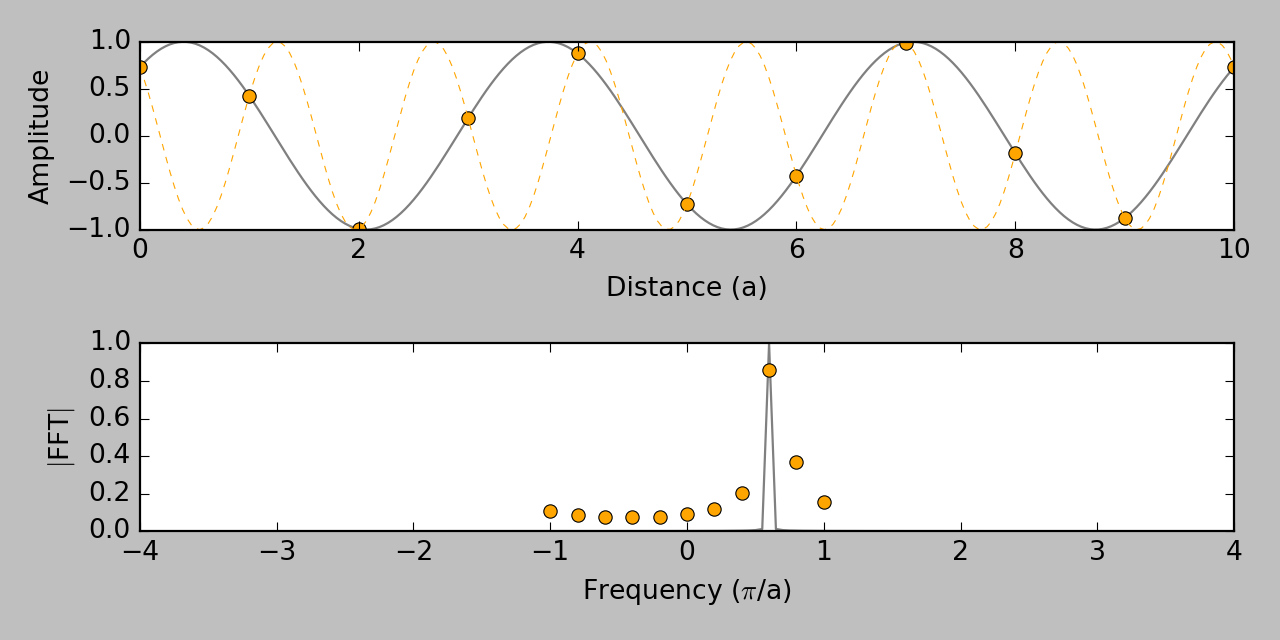

In [4]:
# Try varying sample between 0.1 and 1.1 to see how aliasing impacts complex sinusoids
sample(0.3)